<a href="https://colab.research.google.com/github/dbk9/Simply-Contacts/blob/main/hw4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4: Clustering
1. [20%] Plot your data in a cartesian plane.

  a. Put Age in the x-axis, Height in the Y-axis (you can use the factor of m=15 in this axis) to visualize how close they are using the defined distance

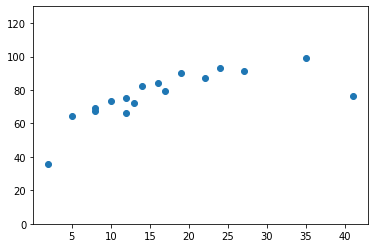

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data.csv")

x = df["Age"].values
y = df["Height"].values * (15)

plt.scatter(x, y)
plt.ylim([0,130])
plt.show()

2. Define the number of clusters K=4, with seeds on Blake, Lebron, Peter and Grace, and compute:

  a) [15%] Assign a group for each of the persons of the table


Centers: 

     Name  Gender Age Height cluster
0   Blake    Male   5    4.3       1
1  Lebron    Male  35    6.6       2
2   Peter    Male  19    6.0       3
3   Grace  Female  12    5.0       4

Cluster 1:

[['Jhon' 'Male' 2 2.4 1]
 ['Keneddy' 'Female' 12 4.4 1]
 ['Henry' 'Male' 8 4.6 1]
 ['Claire' 'Female' 8 4.5 1]
 ['Blake' 'Male' 5 4.3 1]]

Cluster 2:

[['Jessica' 'Female' 41 5.1 2]
 ['Lebron' 'Male' 35 6.6 2]]

Cluster 3:

[['Carlos' 'Male' 24 6.2 3]
 ['Peter' 'Male' 19 6.0 3]
 ['Ana' 'Female' 22 5.8 3]
 ['Jared' 'Male' 27 6.1 3]
 ['David' 'Male' 16 5.6 3]]

Cluster 4:

[['Lathia' 'Female' 17 5.3 4]
 ['Nancy' 'Female' 13 4.8 4]
 ['Jude' 'Female' 10 4.9 4]
 ['Grace' 'Female' 12 5.0 4]
 ['Mason' 'Male' 14 5.5 4]]




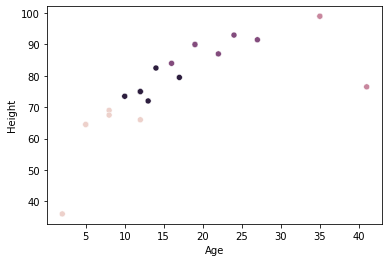

In [101]:
import seaborn as sns

def dist(x, y):
    ageDist = np.abs(x[2] - y[2])
    heightDist = 15 * np.abs(x[3] - y[3])
    return ageDist + heightDist



def compare(x, y):
    count = 0
    for i in range(0, y.shape[0]):
        for j in range(0, 4):
            if(x[j] == y[i][j]):
                count += 1
            if(count == 4):
                y[i][4] = i + 1
                return i + 1
    return 0



def print_clusters(df):
    cluster1 = np.array(df.loc[df["cluster"] == 1])
    cluster2 = np.array(df.loc[df["cluster"] == 2])
    cluster3 = np.array(df.loc[df["cluster"] == 3])
    cluster4 = np.array(df.loc[df["cluster"] == 4])
    clusters = [cluster1, cluster2, cluster3, cluster4]
    
    x = 1
    for c in clusters:
        print(f"\nCluster {x}:\n")
        print(c)
        x += 1



def print_center(df):
    print("\nCenters: \n")
    print(df)
    


def print_all(df, center_df):
    print_center(center_df)
    print_clusters(df)
    
    height_y = df["Height"] * 15
    center_height_y = center_df["Height"] * 15
    
    sns.scatterplot(data=df,
                    x="Age", 
                    y=height_y,
                    hue="cluster"
                    )

    sns.scatterplot(data=center_df,
                    x="Age",
                    y=center_height_y,
                    hue="cluster"
                  )

    legend = plt.legend()
    legend.remove()
    print("\n")
    plt.show()



n = 4
df["cluster"] = 0

seed1 = df[df["Name"] == "Blake"]
seed2 = df[df["Name"] == "Lebron"]
seed3 = df[df["Name"] == "Peter"]
seed4 = df[df["Name"] == "Grace"]

seed1, seed2, seed3, seed4 = np.array(seed1)[0], np.array(seed2)[0], np.array(seed3)[0], np.array(seed4)[0]

seeds = np.array([seed1, seed2, seed3, seed4])

for x in range(0, df.shape[0]):
    temp = np.array(df.iloc[x])
    if(compare(temp, seeds)):
        temp[4] = compare(temp, seeds)
        df.iloc[x] = temp
        continue
    
    dists = np.array([0]*4)
    for i in range(0, seeds.shape[0]):
        dists[i] = dist(temp, seeds[i])
        
    min_index = np.argmin(dists)
    
    temp[4] = min_index + 1
    df.iloc[x] = temp
    


seeds_df = pd.DataFrame(seeds, columns=["Name", "Gender", "Age", "Height", "cluster"])

print_all(df, seeds_df)

b) [15%] Compute new centers


Centers: 

    Age  Height  cluster
0   7.0    4.04      1.0
1  38.0    5.85      2.0
2  21.6    5.94      3.0
3  13.2    5.10      4.0

Cluster 1:

[['Jhon' 'Male' 2 2.4 1]
 ['Keneddy' 'Female' 12 4.4 1]
 ['Henry' 'Male' 8 4.6 1]
 ['Claire' 'Female' 8 4.5 1]
 ['Blake' 'Male' 5 4.3 1]]

Cluster 2:

[['Jessica' 'Female' 41 5.1 2]
 ['Lebron' 'Male' 35 6.6 2]]

Cluster 3:

[['Carlos' 'Male' 24 6.2 3]
 ['Peter' 'Male' 19 6.0 3]
 ['Ana' 'Female' 22 5.8 3]
 ['Jared' 'Male' 27 6.1 3]
 ['David' 'Male' 16 5.6 3]]

Cluster 4:

[['Lathia' 'Female' 17 5.3 4]
 ['Nancy' 'Female' 13 4.8 4]
 ['Jude' 'Female' 10 4.9 4]
 ['Grace' 'Female' 12 5.0 4]
 ['Mason' 'Male' 14 5.5 4]]




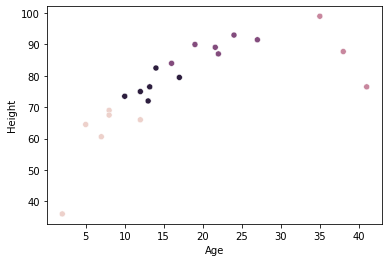

In [102]:
def find_centers(df):
    cluster1 = np.array(df.loc[df["cluster"] == 1])
    cluster2 = np.array(df.loc[df["cluster"] == 2])
    cluster3 = np.array(df.loc[df["cluster"] == 3])
    cluster4 = np.array(df.loc[df["cluster"] == 4])

    clusters = [cluster1, cluster2, cluster3, cluster4]
    new_centers = np.zeros((4,3))
    new_counter = 0

    for c in clusters:
        Ages = np.zeros(c.shape[0])
        Heights = np.zeros(c.shape[0])

        for i in range(0, c.shape[0]):
            Ages[i] = c[i][2]
            Heights[i] = c[i][3]

        new_centers[new_counter][0] = np.average(Ages)
        new_centers[new_counter][1] = np.average(Heights)    
        new_centers[new_counter][2] = new_counter + 1  
        new_counter += 1
    
    return new_centers

new_centers = find_centers(df)
new_center_df = pd.DataFrame(new_centers, columns=["Age", "Height", "cluster"])

print_all(df, new_center_df)

3. Compute and show results in tables:

  a) [15%] Assign a group for each of the persons of the table


Centers: 

    Age  Height  cluster
0   7.0    4.04      1.0
1  38.0    5.85      2.0
2  21.6    5.94      3.0
3  13.2    5.10      4.0

Cluster 1:

[['Jhon' 'Male' 2 2.4 1]
 ['Keneddy' 'Female' 12 4.4 1]
 ['Henry' 'Male' 8 4.6 1]
 ['Claire' 'Female' 8 4.5 1]
 ['Blake' 'Male' 5 4.3 1]]

Cluster 2:

[['Jessica' 'Female' 41 5.1 2]
 ['Lebron' 'Male' 35 6.6 2]]

Cluster 3:

[['Carlos' 'Male' 24 6.2 3]
 ['Peter' 'Male' 19 6.0 3]
 ['Ana' 'Female' 22 5.8 3]
 ['Jared' 'Male' 27 6.1 3]]

Cluster 4:

[['Lathia' 'Female' 17 5.3 4]
 ['Nancy' 'Female' 13 4.8 4]
 ['David' 'Male' 16 5.6 4]
 ['Jude' 'Female' 10 4.9 4]
 ['Grace' 'Female' 12 5.0 4]
 ['Mason' 'Male' 14 5.5 4]]




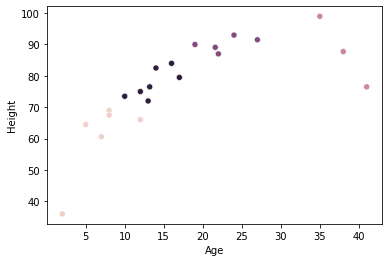

In [103]:
def dist_(x, y):
    age_dist = np.abs(x[2] - y[0])
    height_dist = np.abs(x[3] - y[1]) * 15
    return age_dist + height_dist

def new_clusters(df, centers):
    for i in range(0, df.shape[0]):
        person = np.array(df.iloc[i])
        dists = np.zeros(4)
        for j in range(0, centers.shape[0]):
            dists[j] = dist_(person, centers[j])
        min_dist = dists.min()
        min_index = np.argmin(dists)

        person[4] = min_index + 1
        df.iloc[i] = person

new_clusters(df, new_centers)
print_all(df, new_center_df)

  b) [15%] Compute a new center


Centers: 

         Age    Height  cluster
0   7.000000  4.040000      1.0
1  38.000000  5.850000      2.0
2  23.000000  6.025000      3.0
3  13.666667  5.183333      4.0

Cluster 1:

[['Jhon' 'Male' 2 2.4 1]
 ['Keneddy' 'Female' 12 4.4 1]
 ['Henry' 'Male' 8 4.6 1]
 ['Claire' 'Female' 8 4.5 1]
 ['Blake' 'Male' 5 4.3 1]]

Cluster 2:

[['Jessica' 'Female' 41 5.1 2]
 ['Lebron' 'Male' 35 6.6 2]]

Cluster 3:

[['Carlos' 'Male' 24 6.2 3]
 ['Peter' 'Male' 19 6.0 3]
 ['Ana' 'Female' 22 5.8 3]
 ['Jared' 'Male' 27 6.1 3]]

Cluster 4:

[['Lathia' 'Female' 17 5.3 4]
 ['Nancy' 'Female' 13 4.8 4]
 ['David' 'Male' 16 5.6 4]
 ['Jude' 'Female' 10 4.9 4]
 ['Grace' 'Female' 12 5.0 4]
 ['Mason' 'Male' 14 5.5 4]]




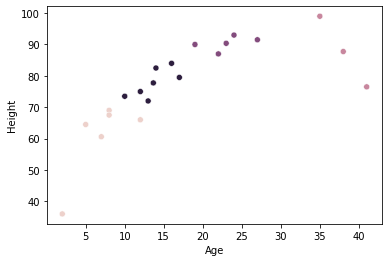

In [104]:
new_centers_1 = find_centers(df)
new_centers_1_df = pd.DataFrame(new_centers_1, columns = ["Age", "Height", "cluster"])

new_clusters(df, new_centers_1)
print_all(df, new_centers_1_df)

4. [10%] Do you see any change in the assignations of the clusters? Would you recommend an
extra round of computations?

  The cluster centers for cluster 3 and 4 have changed, while cluster 1 and 2 remained unchanged. However, all the data points are the same, so another round of computation may provide better models.

5. [10%] Could you tell some characteristics about the clusters created. Check the age, and/or
height of the elements of each cluster. Do the cluster corresponds makes sense in the real
world?

Cluster 1 is made up of people under the age of 14. Cluster 2 has people who are age 35 and above. Cluster 3 is made up of people with age above 18 but less than 35. Cluster 4 has people who are 13-17 years old. The clusters do make snese in the real world.